In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Step 1: Reading the data Reading the data with python
This is one of the most important steps in data analysis! You must understand the data and the domain well before trying to apply any machine learning/AI algorithm.

In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np
VehiclePrices=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Capstone/Australian_Vehicle_Prices_UPDATED.csv', encoding='latin')
print('Shape before deleting duplicate values:', VehiclePrices.shape)

# Removing duplicate rows if any
VehiclePrices=VehiclePrices.drop_duplicates()
print('Shape After deleting duplicate values:', VehiclePrices.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
VehiclePrices.head(10)

Shape before deleting duplicate values: (16734, 17)
Shape After deleting duplicate values: (16732, 17)


,Brand,Year,Model,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,5595,White / Black,"Caringbah, NSW",4,SUV,4.0,7.0,51990
1,MG,2022.0,MG3,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,16,Black / Black,"Brookvale, NSW",4,Hatchback,5.0,5.0,19990
2,BMW,2022.0,430I,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,8472,Grey / White,"Sylvania, NSW",4,Coupe,2.0,4.0,108988
3,Mercedes-Benz,2011.0,E500,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,11,136517,White / Brown,"Mount Druitt, NSW",8,Coupe,2.0,4.0,32990
4,Renault,2022.0,Arkana,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6,1035,Grey / Black,"Castle Hill, NSW",4,SUV,4.0,5.0,34990
5,Toyota,2004.0,Estima,2004 Toyota Estima T EDITION,USED,Automatic,Other,Unleaded,-,160230,Grey,"Saint Marys, NSW",-,Commercial,NaN,NaN,9990
6,Land,2017.0,Rover,2017and Rover Range Rover Evoque TD4 180 HSE D...,USED,Automatic,AWD,Diesel,5.1,67662,White / Black,"Blacktown, NSW",4,SUV,2.0,4.0,62280
7,Nissan,2000.0,Pulsar,2000 Nissan PulsarX,USED,Automatic,Front,Unleaded,8,300539,Red / Grey,"Wentworthville, NSW",4,Hatchback,5.0,5.0,2995
8,Toyota,2013.0,86,2013 Toyota 86 GT,USED,Automatic,Rear,Premium,7.1,82012,Black,"Mcgraths Hill, NSW",4,Coupe,2.0,4.0,24888
9,Honda,2014.0,Jazz,2014 Honda Jazz Hybrid,USED,Automatic,Front,Hybrid,4.5,38229,Blue,"Lidcombe, NSW",4,Hatchback,5.0,5.0,17900


# Key observations from Step 1 about Data Description
* Brand is the brand of the vehicle.
* Year is the year that the vehicle was made.
* Model is the model of the vehicle.
* Title is the full name of the vehicle including the Brand Year and Model.
* UsedOrNew is the whether or not a vehicle is used, new or a demo vehicle.
* FuelType is the type of fuel that the vehicle uses.
* FuelConsumption is the rate at which the vehicle consumes fuel for every 100 km in Litres
* Kilometres is the amount of kilometres that the engine has done.
* ColourExtInt is the colour of the exterior of the vehicle as well as the interior of the vehicle separated by '/'.
* Location is the current location that the vehicle resides.
* BodyType describes the shape of the chassis of the vehicle.
* Doors is the number of doors on the vehicle.
* Seats is the number of seats inside the vehicle.
* Price is the total cost of purchasing the vehicle. It is also the target variable that this program will predict.

# Problem Statement Definition
*   To create a prediction model that can predict the price of a vehicle based on its attributes.
*   Target Variable: Price Predictors = Brand, Year, Model, Title etc.

# Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.
* based on the problem statement we need to create a supervised ML Regression model, as the target variable is Continuous.

In [ ]:
# Deleting a row that was causing an error
VehiclePrices = VehiclePrices.drop(15266)

In [ ]:
# Deleting rows with incorrect data and converting columns to numeric data
VehiclePrices['Price'] = VehiclePrices['Price'].replace('POA', np.nan)
VehiclePrices['Price'] = pd.to_numeric(VehiclePrices['Price'])
VehiclePrices['Kilometres'] = VehiclePrices['Kilometres'].replace('-', np.nan)
VehiclePrices['Kilometres'] = VehiclePrices['Kilometres'].replace('- ', np.nan)
VehiclePrices['Kilometres'] = VehiclePrices['Kilometres'].replace('- / -', np.nan)
VehiclePrices['Kilometres'] = pd.to_numeric(VehiclePrices['Kilometres'])

VehiclePrices['CylindersinEngine'] = VehiclePrices['CylindersinEngine'].replace('-', np.nan)
VehiclePrices['CylindersinEngine'] =  pd.to_numeric(VehiclePrices['CylindersinEngine'])

VehiclePrices['FuelConsumption'] = VehiclePrices['FuelConsumption'].replace('-', np.nan)
VehiclePrices['FuelConsumption'] =  pd.to_numeric(VehiclePrices['FuelConsumption'])

VehiclePrices['Doors'] = VehiclePrices['Doors'].replace('-', np.nan)
VehiclePrices['Doors'] =  pd.to_numeric(VehiclePrices['Doors'])

VehiclePrices['Seats'] = VehiclePrices['Seats'].replace('-', np.nan)
VehiclePrices['Seats'] =  pd.to_numeric(VehiclePrices['Seats'])

VehiclePrices = VehiclePrices.replace('-', np.nan)

In [ ]:
#VehiclePrices['CylindersinEngine'] = pd.to_numeric(VehiclePrices['CylindersinEngine'])
print(VehiclePrices['CylindersinEngine'])

0        4.0
1        4.0
2        4.0
3        8.0
4        4.0
        ... 
16729    NaN
16730    NaN
16731    4.0
16732    4.0
16733    4.0
Name: CylindersinEngine, Length: 16731, dtype: float64


#Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.)

<Axes: >

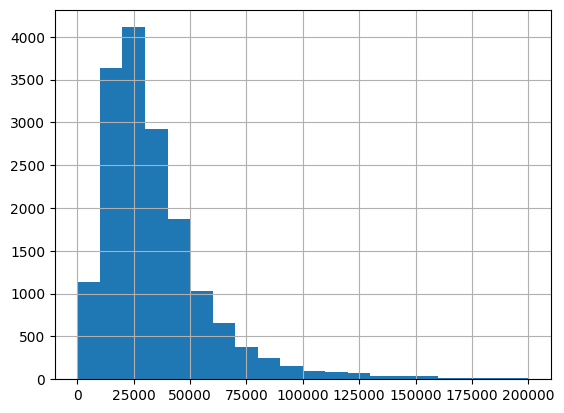

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values

formatter = mticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)

VehiclePrices['Price'].hist(bins = 20, range = (0,200000))

# Step 5: Basic Exploratory Data Analysis

In [ ]:
# Looking at sample rows in the data
VehiclePrices.head()

,Brand,Year,Model,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,5595.0,White / Black,"Caringbah, NSW",4.0,SUV,4.0,7.0,51990.0
1,MG,2022.0,MG3,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,16.0,Black / Black,"Brookvale, NSW",4.0,Hatchback,5.0,5.0,19990.0
2,BMW,2022.0,430I,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,8472.0,Grey / White,"Sylvania, NSW",4.0,Coupe,2.0,4.0,108988.0
3,Mercedes-Benz,2011.0,E500,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,11.0,136517.0,White / Brown,"Mount Druitt, NSW",8.0,Coupe,2.0,4.0,32990.0
4,Renault,2022.0,Arkana,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6.0,1035.0,Grey / Black,"Castle Hill, NSW",4.0,SUV,4.0,5.0,34990.0


In [ ]:
# Looking at sample rows in the data
VehiclePrices.tail()

,Brand,Year,Model,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
16729,Toyota,2014.0,Alphard,2014 Toyota Alphard,USED,Automatic,Front,Unleaded,NaN,66000.0,Grey,"Rocklea, QLD",NaN,Commercial,7.0,NaN,29500.0
16730,Mercedes-Benz,2012.0,S-Class,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,Rear,Diesel,NaN,117432.0,Silver,"Port Melbourne, VIC",NaN,NaN,NaN,NaN,39888.0
16731,Suzuki,2022.0,Vitara,2022 Suzuki Vitara 1.6L,DEMO,Automatic,Front,Unleaded,6.2,5165.0,Yellow,"Dinmore, QLD",4.0,SUV,4.0,5.0,35280.0
16732,Mercedes-Benz,2016.0,GLC250,2016 Mercedes-Benz GLC250,USED,Automatic,AWD,Premium,7.2,85525.0,Grey / Black,"Albion, QLD",4.0,SUV,4.0,5.0,41888.0
16733,Mercedes-Benz,2021.0,C200,2021 Mercedes-Benz C200,USED,Automatic,Rear,Unleaded,7.0,31852.0,Gold,"Yatala, QLD",4.0,Sedan,4.0,5.0,65888.0


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
VehiclePrices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16731 entries, 0 to 16733
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16730 non-null  object 
 1   Year               16730 non-null  float64
 2   Model              16730 non-null  object 
 3   Title              16730 non-null  object 
 4   UsedOrNew          16730 non-null  object 
 5   Transmission       16480 non-null  object 
 6   DriveType          16730 non-null  object 
 7   FuelType           16095 non-null  object 
 8   FuelConsumption    15034 non-null  float64
 9   Kilometres         16140 non-null  float64
 10  ColourExtInt       16372 non-null  object 
 11  Location           16281 non-null  object 
 12  CylindersinEngine  15057 non-null  float64
 13  BodyType           16450 non-null  object 
 14  Doors              15128 non-null  float64
 15  Seats              15027 non-null  float64
 16  Price              16679 no

In [ ]:
# Looking at the descriptive statistics of the data
VehiclePrices.describe(include='all')

,Brand,Year,Model,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
count,16730,16730.000000,16730,16730,16730,16480,16730,16095,15034.000000,16140.000000,16372,16281,15057.000000,16450,15128.000000,15027.000000,1.667900e+04
unique,76,NaN,781,8801,3,2,5,8,NaN,NaN,829,618,NaN,10,NaN,NaN,NaN
top,Toyota,NaN,Hilux,2019 Hyundai I30 Active,USED,Automatic,Front,Unleaded,NaN,NaN,White,"Minchinbury, NSW",NaN,SUV,NaN,NaN,NaN
freq,2783,NaN,430,60,14993,14528,6976,6985,NaN,NaN,2846,544,NaN,6906,NaN,NaN,NaN
mean,NaN,2016.228811,NaN,NaN,NaN,NaN,NaN,NaN,7.663749,100108.511338,NaN,NaN,4.423723,NaN,4.011370,5.101417,3.730450e+04
std,NaN,5.247569,NaN,NaN,NaN,NaN,NaN,NaN,2.324749,78210.024743,NaN,NaN,1.120664,NaN,0.713368,1.119252,3.717984e+04
min,NaN,1940.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,0.000000,NaN,2.000000,2.000000,8.800000e+01
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.500000,40772.000000,NaN,NaN,4.000000,NaN,4.000000,5.000000,1.899900e+04
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,85965.500000,NaN,NaN,4.000000,NaN,4.000000,5.000000,2.950000e+04
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.800000,146561.500000,NaN,NaN,4.000000,NaN,4.000000,5.000000,4.399000e+04


In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
VehiclePrices.nunique()

Brand                   76
Year                    45
Model                  781
Title                 8801
UsedOrNew                3
Transmission             2
DriveType                5
FuelType                 8
FuelConsumption        156
Kilometres           14260
ColourExtInt           829
Location               618
CylindersinEngine        9
BodyType                10
Doors                    9
Seats                   13
Price                 3793
dtype: int64

## Observations from Step 5 - Basic Exploratory Data Analysis
* Brand is categorical
* Year is categorical
* Title is categorical
* UsedOrNew is categorical
* Transmission is categorical
* DriveType is categorical
* FuelType is categorical
* FuelConsumption is continuous
* Kilometres is continuous
* ColourExtInt is categorical
* Location is categorical
* CylindersinEngine is categorical
* BodyType is categorical
* Doors is categorical
* Seats is categorical
* Price is continuous

## Step 7: Removing Unwanted columns
* There are no qualitative columns in the data.
* Hence no need to remove any column.

## Step 8: Visual Exploratory Data Analysis

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

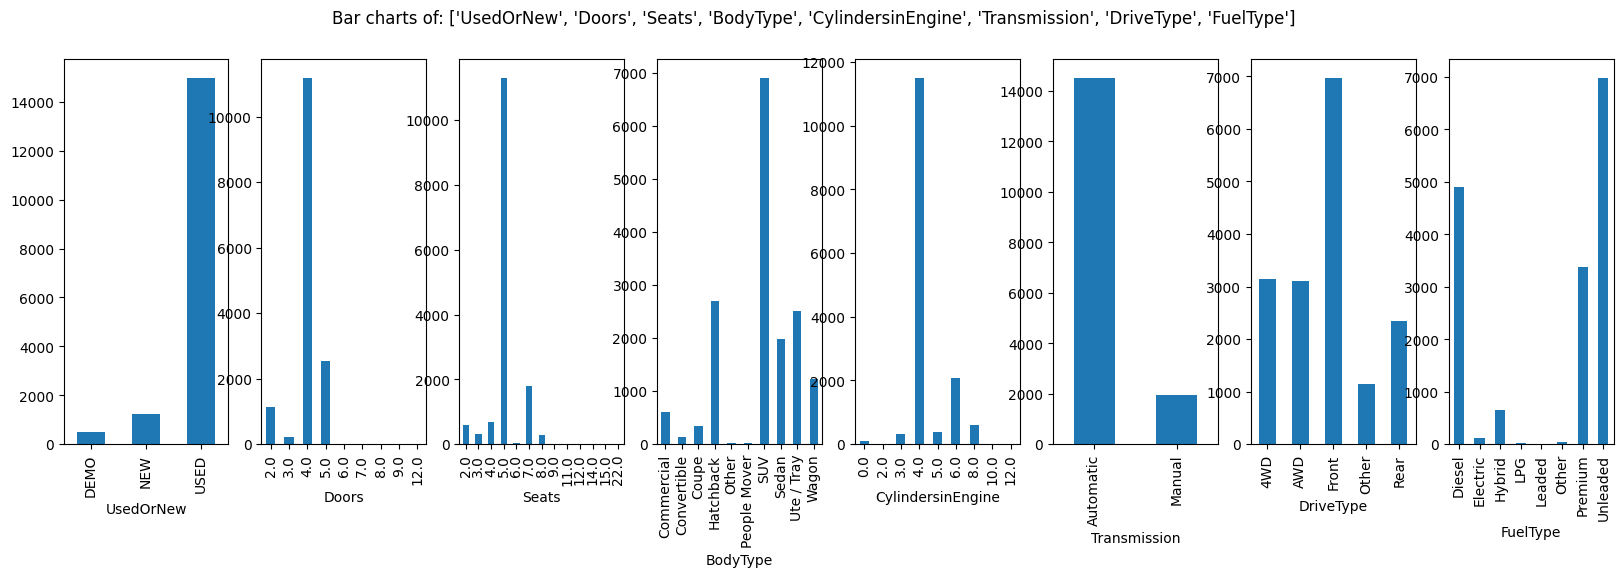

In [ ]:
PlotBarCharts(inpData=VehiclePrices, colsToPlot=['UsedOrNew','Doors','Seats','BodyType','CylindersinEngine','Transmission','DriveType','FuelType'])

## Observations from Step 8 - Visual Exploratory Data Analysis
* UsedOrNew is positively skewed
* Doors has 4 doors as a mode
* Seats has 5 seats as a mode
* BodyType has SUV as a mode
* CylindersinEngine has 4 as a mode
* Transmission is skewed towards the automatics
* Drivetype has Front as a mode
* Fuel type is multimodal with Diesel and Unleaded being the 2 modes

# Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<Axes: title={'center': 'Kilometres'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

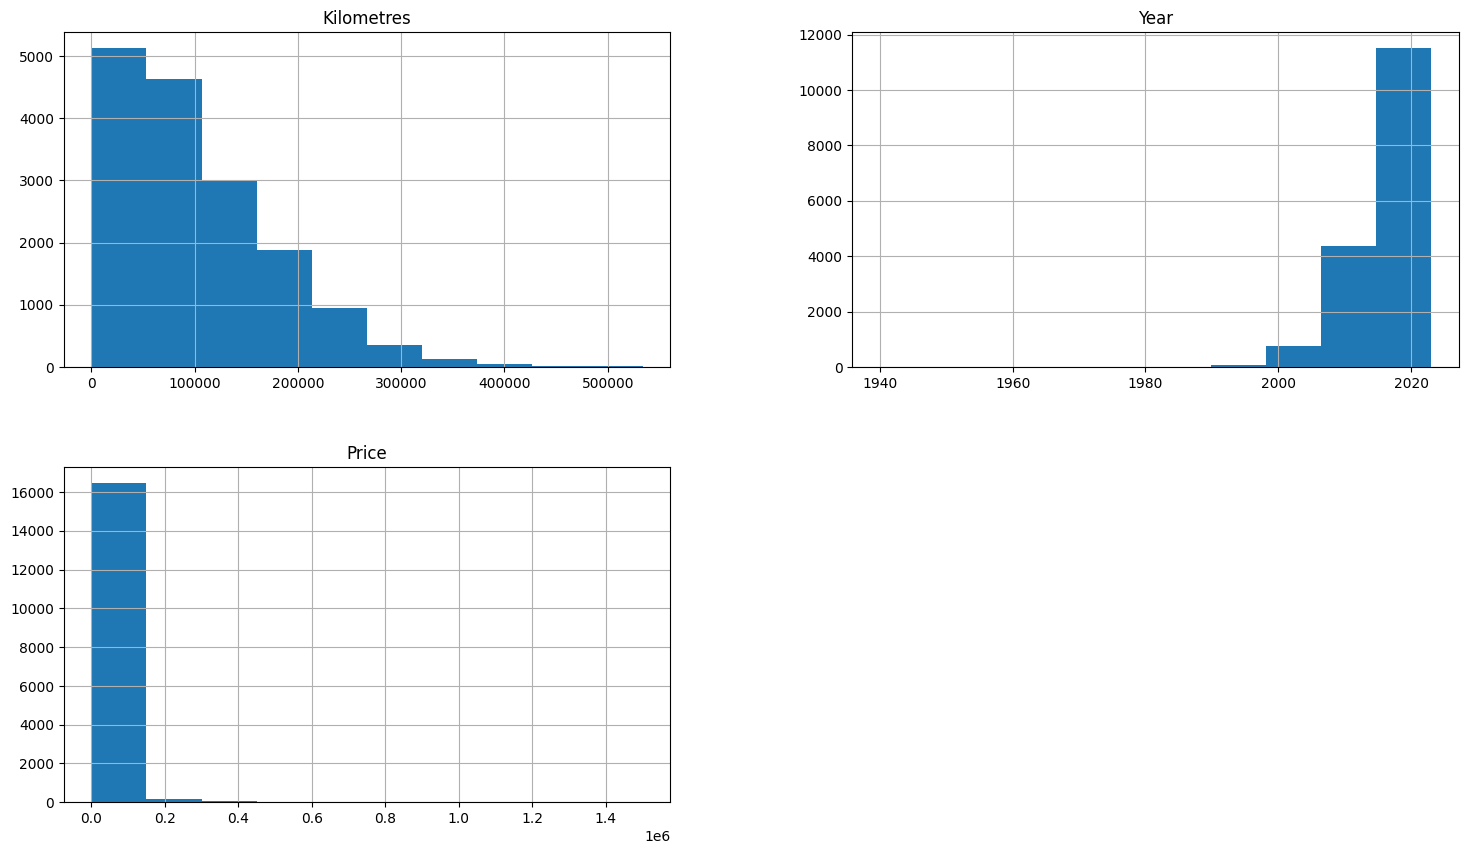

In [ ]:
# Plotting histograms of multiple columns together
pd.options.display.float_format = '{:.4f}'.format

VehiclePrices.hist(['Kilometres','Year','Price'], figsize=(18,10))


## Observations from Step 9
* Kilometres distribution is good
* Year outliers seen below 1980 needs to be treated
* Price outliers seen above 200000 needs to be treated

## Step 10: Outlier Analysis

In [ ]:
VehiclePrices['Price'][VehiclePrices['Price']<200000].sort_values(ascending=False)

5435    199990.0000
7098    199987.0000
15213   199900.0000
11110   199900.0000
14731   199900.0000
            ...    
1747      1895.0000
4862      1895.0000
13203     1200.0000
12460      900.0000
15831       88.0000
Name: Price, Length: 16549, dtype: float64

In [ ]:
VehiclePrices['Price'][VehiclePrices['Price']>200000] = 199990

In [ ]:
VehiclePrices['Year'][VehiclePrices['Year']>1980].sort_values(ascending=False)

3595    2023.0000
14801   2023.0000
14786   2023.0000
14788   2023.0000
14790   2023.0000
           ...   
2301    1985.0000
15505   1985.0000
15824   1984.0000
7533    1981.0000
13005   1981.0000
Name: Year, Length: 16724, dtype: float64

# Observation 1981 is lowest logical value so replace everything below 1980 with that

In [ ]:
VehiclePrices['Year'][VehiclePrices['Year']<1980] = 1981

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

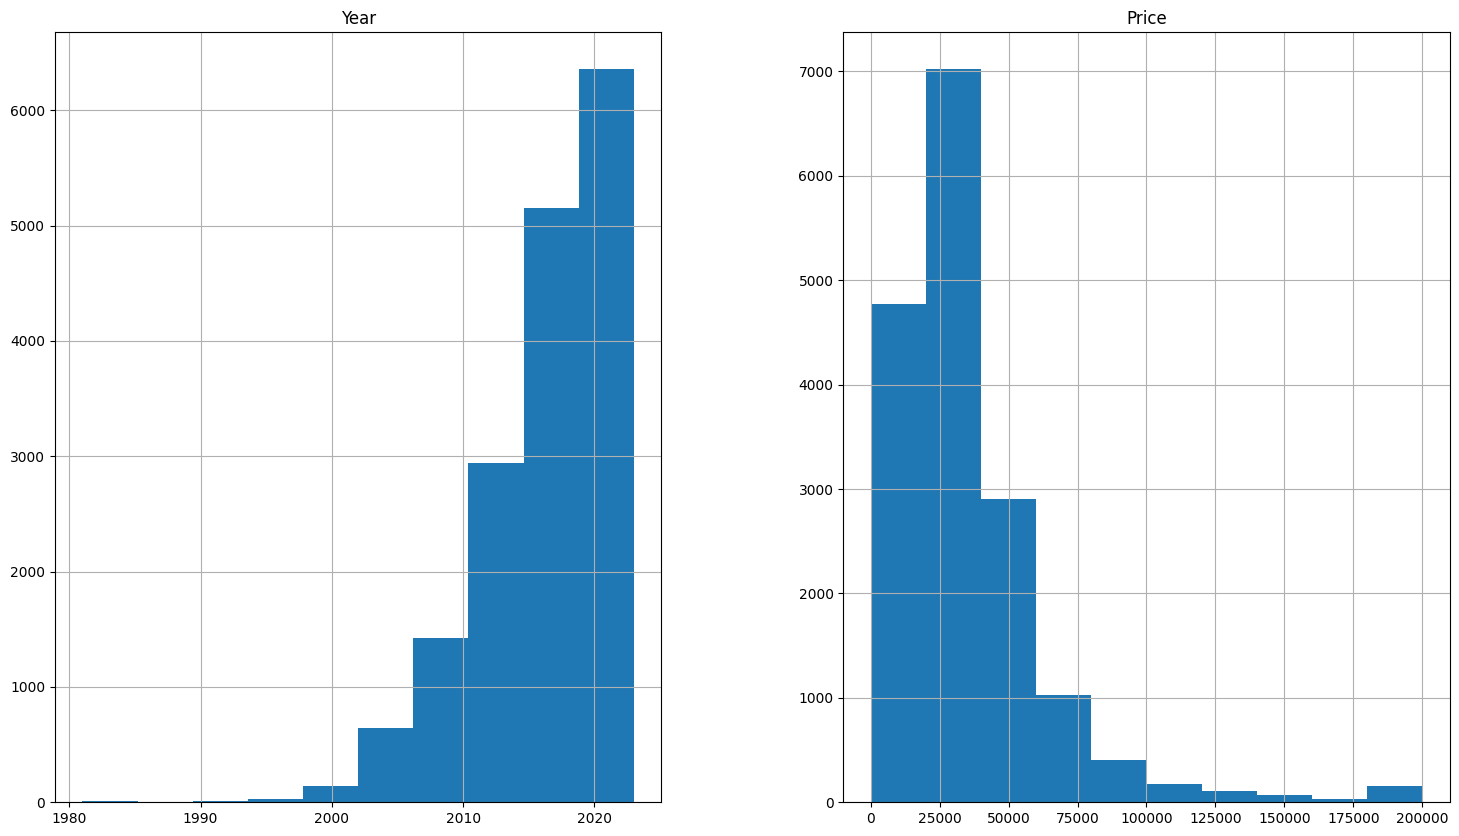

In [ ]:
VehiclePrices.hist(['Year','Price'], figsize=(18,10))

## Step 12: Missing Values Analysis

In [ ]:
#Finding out how many missing values there are for each attribute
VehiclePrices.isnull().sum()

Brand                   1
Year                    1
Model                   1
Title                   1
UsedOrNew               1
Transmission          251
DriveType               1
FuelType              636
FuelConsumption      1697
Kilometres            591
ColourExtInt          359
Location              450
CylindersinEngine    1674
BodyType              281
Doors                1603
Seats                1704
Price                  52
dtype: int64

In [ ]:
# Removes rows with null values
VehiclePrices = VehiclePrices.dropna(subset=['Kilometres'], axis=0)
VehiclePrices = VehiclePrices.dropna(subset=['BodyType'], axis=0)
VehiclePrices = VehiclePrices.dropna(subset=['Doors'], axis=0)
VehiclePrices = VehiclePrices.dropna(subset=['Seats'], axis=0)
VehiclePrices = VehiclePrices.dropna(subset=['Price'], axis=0)
VehiclePrices = VehiclePrices.dropna(subset=['Transmission'], axis=0)
VehiclePrices = VehiclePrices.dropna(subset=['FuelType'], axis=0)
VehiclePrices = VehiclePrices.dropna(subset=['ColourExtInt'], axis=0)

In [ ]:
VehiclePrices.isnull().sum()

Brand                0
Year                 0
Model                0
Title                0
UsedOrNew            0
Transmission         0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

## Step 13: Feature Selection (Attribute Selection)


Best predictors:\
Year **Categorical**

UsedOrNew **Categorical**

Kilometres **Continuous**

BodyType **Categorical**

FuelConsumption **Categorical**

Transmission **Categorical**
\
Continuous Vs Continuous ---- Scatter Plot

Categorical Vs Continuous---- Box Plot

Categorical Vs Categorical---- Grouped Bar Plots

Statistical measurement of relationship strength between variables

Continuous Vs Continuous ---- Correlation matrix

Categorical Vs Continuous---- ANOVA test

Categorical Vs Categorical--- Chi-Square test

For this dataset, the Target variable is Continuous, hence following two scenarios will need attention

Continuous Target Variable Vs Continuous Predictor

Continuous Target Variable Vs Categorical Predictor

Because price is continuous and kilometres is continuous, I will use a scatter plot to represent the relationship between these 2 variables

<Axes: title={'center': 'Kilometres VS Price'}, xlabel='Kilometres', ylabel='Price'>

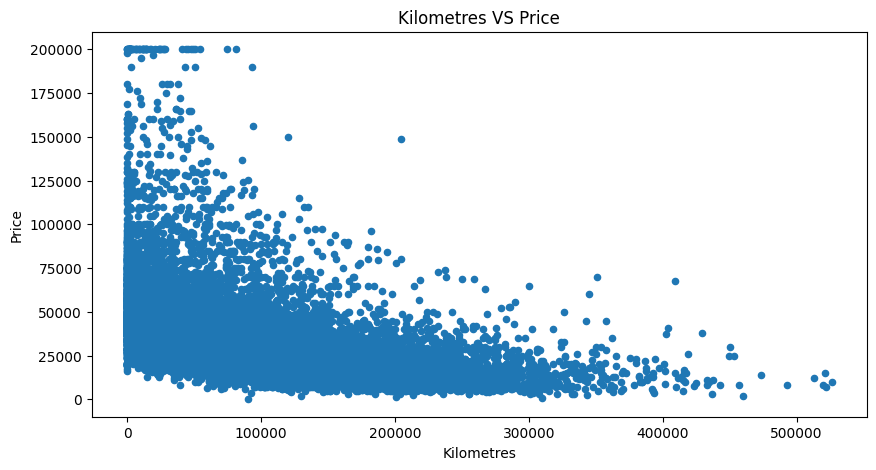

In [ ]:
VehiclePrices.plot.scatter(x='Kilometres', y='Price', figsize=(10,5), title="Kilometres VS Price")

## Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [ ]:
# Calculating correlation matrix
ContinuousCols=['Price','Kilometres']

# Creating the correlation matrix
CorrelationData=VehiclePrices[ContinuousCols].corr()
CorrelationData

,Price,Kilometres
Price,1.0000,-0.4755
Kilometres,-0.4755,1.0000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price   1.0000
Name: Price, dtype: float64

# Observations from step 14
Kilometres is not a good predictor of price so it will not be used

# Step 15: Relationship Exploration
Where the target variable is continuous and the predictors are categorical I will use box plots to represent the relationship between the 2 variables.\
Categorical variables: Brand, Year, UsedOrNew, Transmission, DriveType, FuelType, Consumption, Colour, Location, Cylinders, BodyType, Doors, Seats

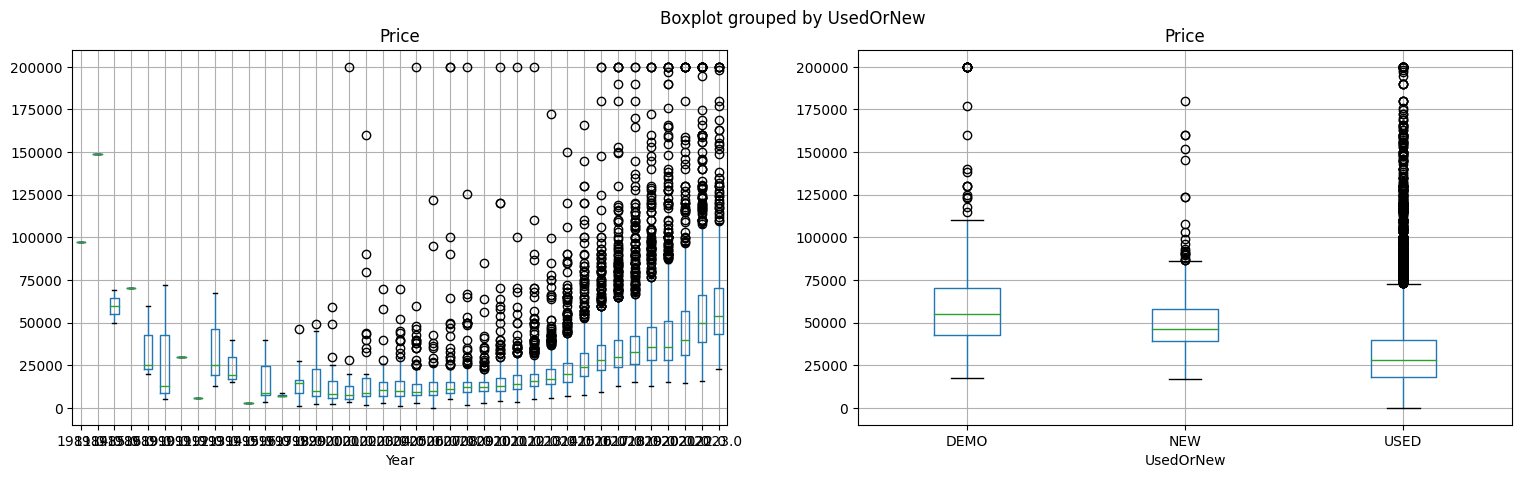

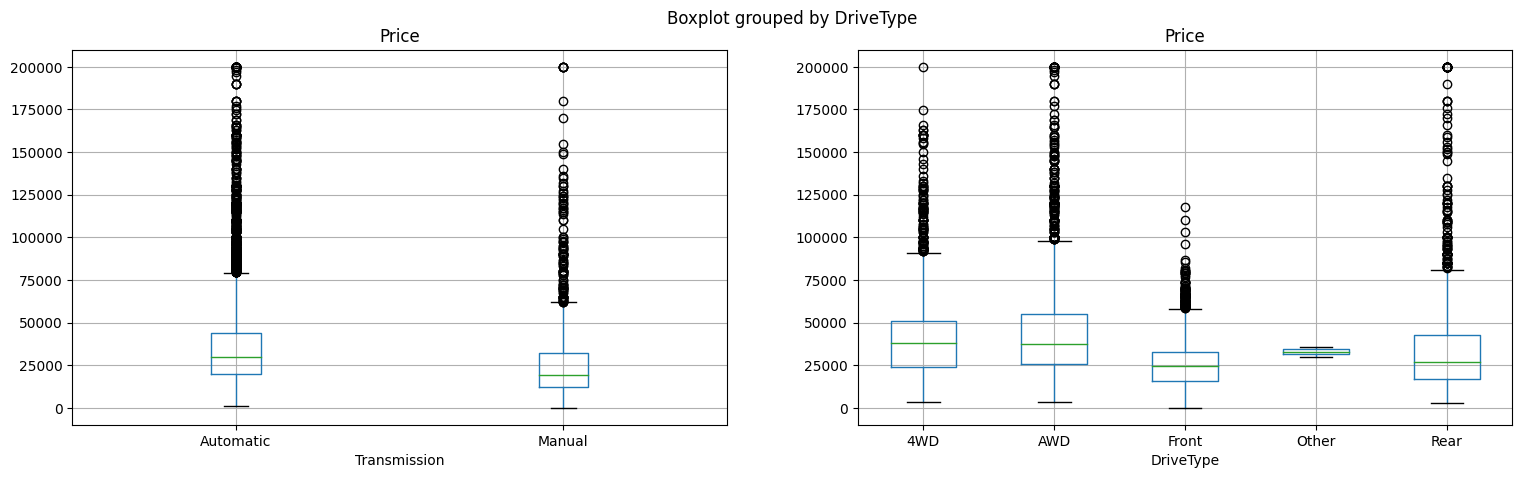

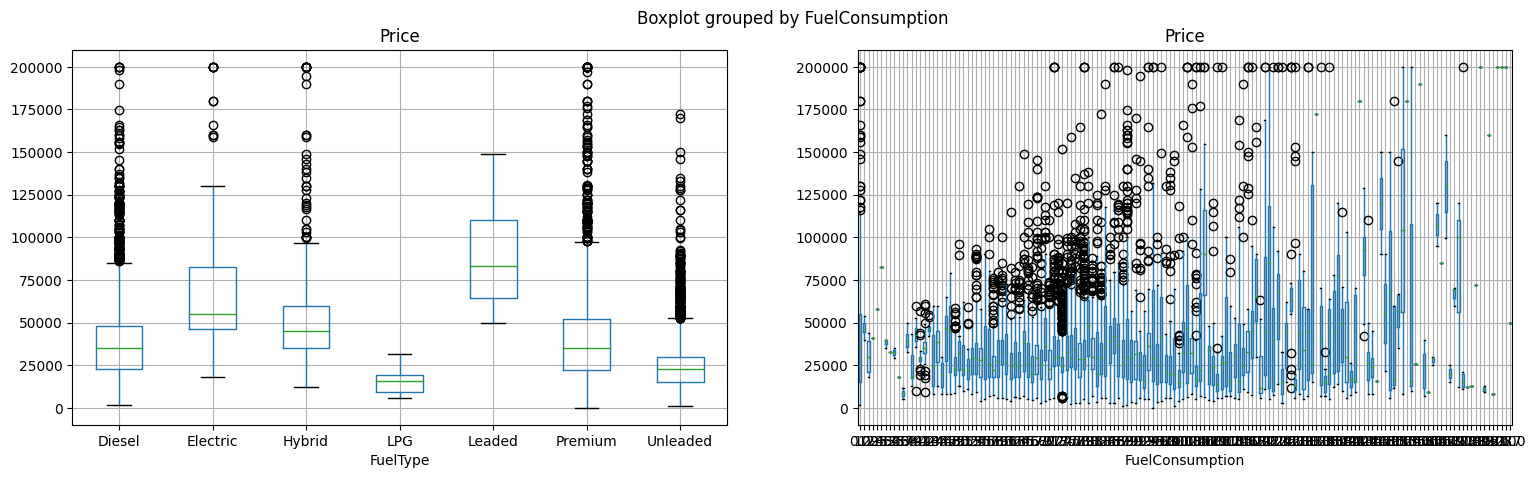

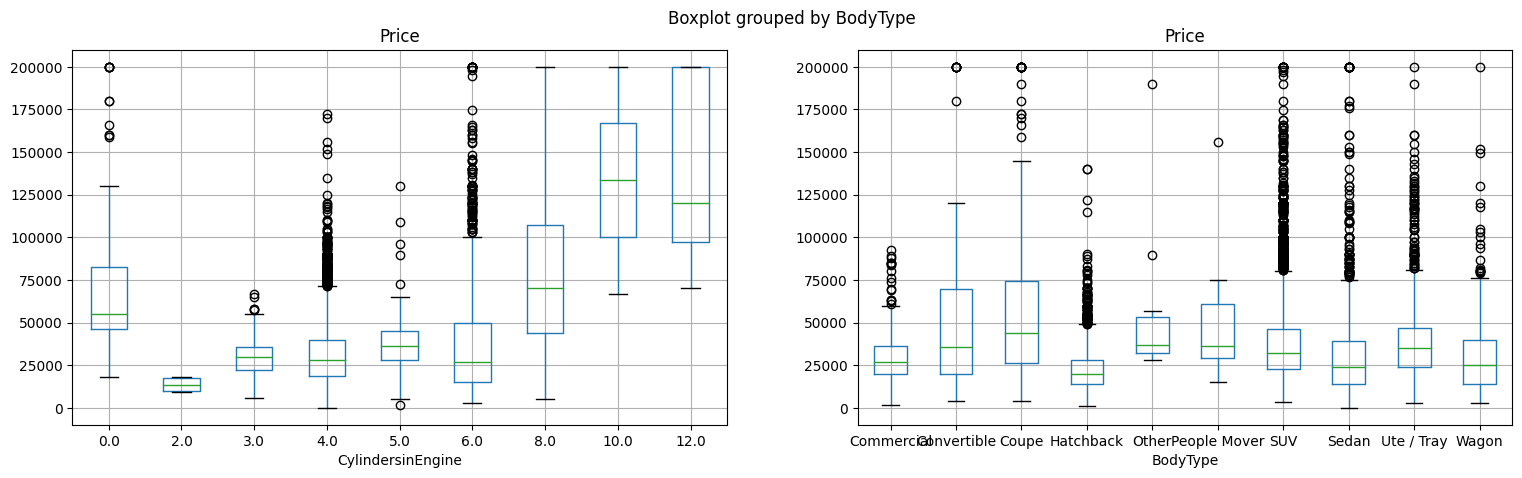

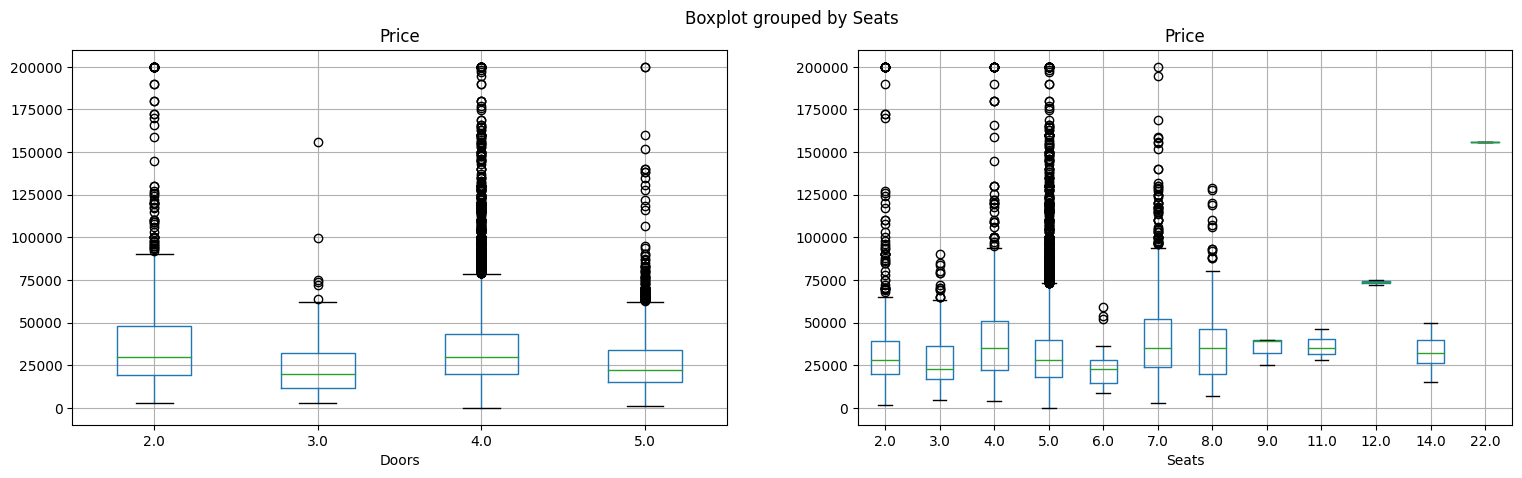

In [ ]:
CategoricalColsList=['Year','UsedOrNew']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    VehiclePrices.boxplot(column='Price', by=PredictorCol, figsize=(10,10), vert=True, ax=PlotCanvas[i])

CategoricalColsList2=['Transmission','DriveType']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList2), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList2, range(len(CategoricalColsList2))):
    VehiclePrices.boxplot(column='Price', by=PredictorCol, figsize=(10,10), vert=True, ax=PlotCanvas[i])

CategoricalColsList3=['FuelType','FuelConsumption']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList3), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList3, range(len(CategoricalColsList3))):
    VehiclePrices.boxplot(column='Price', by=PredictorCol, figsize=(10,10), vert=True, ax=PlotCanvas[i])

CategoricalColsList4=['CylindersinEngine','BodyType']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList4), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList4, range(len(CategoricalColsList4))):
    VehiclePrices.boxplot(column='Price', by=PredictorCol, figsize=(10,10), vert=True, ax=PlotCanvas[i])

CategoricalColsList5=['Doors','Seats']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList5), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList5, range(len(CategoricalColsList5))):
    VehiclePrices.boxplot(column='Price', by=PredictorCol, figsize=(10,10), vert=True, ax=PlotCanvas[i])

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Year','UsedOrNew','Transmission','DriveType','FuelType','FuelConsumption','CylindersinEngine','BodyType','Doors','Seats']
FunctionAnova(inpData=VehiclePrices,
              TargetVariable='Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Year is correlated with Price | P-Value: 0.0
UsedOrNew is correlated with Price | P-Value: 3.7725152160603e-155
Transmission is correlated with Price | P-Value: 5.13545247022957e-45
DriveType is correlated with Price | P-Value: 0.0
FuelType is correlated with Price | P-Value: 0.0
FuelConsumption is correlated with Price | P-Value: 0.0
CylindersinEngine is correlated with Price | P-Value: 0.0
BodyType is correlated with Price | P-Value: 6.052437014364186e-237
Doors is correlated with Price | P-Value: 1.8192402548245323e-72
Seats is correlated with Price | P-Value: 1.2307009257662064e-59


['Year',
 'UsedOrNew',
 'Transmission',
 'DriveType',
 'FuelType',
 'FuelConsumption',
 'CylindersinEngine',
 'BodyType',
 'Doors',
 'Seats']

#Observations from Step 16
The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable.

This is something you can guess by looking at the box plots!

Final selected Categorical columns:

Year, UsedOrNew, Transmission, DriveType, FuelType, FuelConsumption, CylindersinEngine, BodyType, Doors, Seats

In [ ]:
SelectedColumns=['Year','Kilometres','UsedOrNew','FuelConsumption','CylindersinEngine']

# Selecting final columns
DataForML= VehiclePrices[SelectedColumns]
DataForML.head()

,Year,Kilometres,UsedOrNew,FuelConsumption,CylindersinEngine
0,2022.0000,5595.0000,DEMO,8.7000,4.0000
1,2022.0000,16.0000,USED,6.7000,4.0000
2,2022.0000,8472.0000,USED,6.6000,4.0000
3,2011.0000,136517.0000,USED,11.0000,8.0000
4,2022.0000,1035.0000,USED,6.0000,4.0000


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price']=VehiclePrices['Price']

# Printing sample rows
DataForML_Numeric.head()

,Year,Kilometres,FuelConsumption,CylindersinEngine,UsedOrNew_DEMO,UsedOrNew_NEW,UsedOrNew_USED,Price
0,2022.0000,5595.0000,8.7000,4.0000,True,False,False,51990.0000
1,2022.0000,16.0000,6.7000,4.0000,False,False,True,19990.0000
2,2022.0000,8472.0000,6.6000,4.0000,False,False,True,108988.0000
3,2011.0000,136517.0000,11.0000,8.0000,False,False,True,32990.0000
4,2022.0000,1035.0000,6.0000,4.0000,False,False,True,34990.0000


In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Year', 'Kilometres', 'FuelConsumption', 'CylindersinEngine',
       'UsedOrNew_DEMO', 'UsedOrNew_NEW', 'UsedOrNew_USED', 'Price'],
      dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Year', 'Kilometres', 'FuelConsumption', 'CylindersinEngine',
       'UsedOrNew_DEMO', 'UsedOrNew_NEW', 'UsedOrNew_USED']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9774, 7)
(9774,)
(4190, 7)
(4190,)


# Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.47079412956936795

##### Model Validation and Accuracy Calculations ##########
    Year  Kilometres  FuelConsumption  CylindersinEngine  UsedOrNew_DEMO  \
0 0.6905      0.4181           0.3000             0.3333          0.0000   
1 0.8810      0.1445           0.4296             0.5000          0.0000   
2 0.8095      0.0751           0.2370             0.3333          0.0000   
3 0.8571      0.2965           0.2481             0.3333          0.0000   
4 0.9762      0.0046           0.0000             0.0000          1.0000   

   UsedOrNew_NEW  UsedOrNew_USED      Price  PredictedPrice  
0         0.0000          1.0000  8999.0000       7872.0000  
1         0.0000          1.0000 41999.0000      55808.0000  
2         0.0000          1.0000 20990.0000      31808.0000  
3         0.0000          1.0000 20990.0000      27072.0000  
4         0.0000          0.0000 61940.0000      20160.0000  
Mean Accuracy on test data: 56.26935485820662
Median Accuracy

# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.6729800909950954

##### Model Validation and Accuracy Calculations ##########
    Year  Kilometres  FuelConsumption  CylindersinEngine  UsedOrNew_DEMO  \
0 0.6905      0.4181           0.3000             0.3333          0.0000   
1 0.8810      0.1445           0.4296             0.5000          0.0000   
2 0.8095      0.0751           0.2370             0.3333          0.0000   
3 0.8571      0.2965           0.2481             0.3333          0.0000   
4 0.9762      0.0046           0.0000             0.0000          1.0000   

   UsedOrNew_NEW  UsedOrNew_USED      Price  PredictedPrice  
0         0.0000          1.0000  8999.0000      13056.0000  
1         0.0000          1.0000 41999.0000      44257.0000  
2         0.0000          1.0000 20990.0000      25555.0000  
3         0.0000          1.0000 20990.0000      32764.0000  
4         0.0000          0.0000 61940.0000      77814.0000  
Mean Accuracy on tes

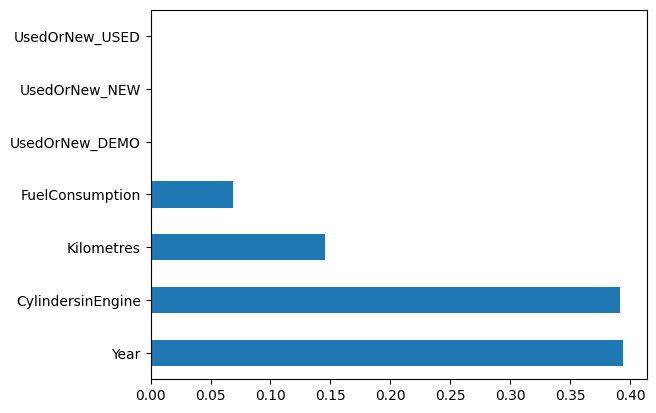

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting/Visualising the decision tree

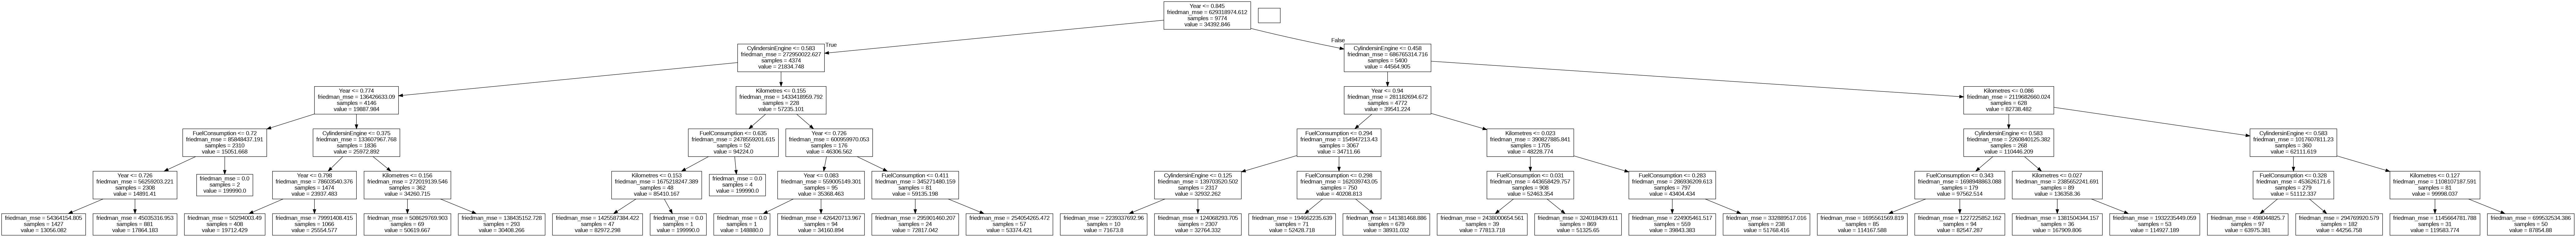

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=8000,height=2000)
# Double click on the graph to zoom in

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.652961083161032

##### Model Validation and Accuracy Calculations ##########
    Year  Kilometres  FuelConsumption  CylindersinEngine  UsedOrNew_DEMO  \
0 0.6905      0.4181           0.3000             0.3333          0.0000   
1 0.8810      0.1445           0.4296             0.5000          0.0000   
2 0.8095      0.0751           0.2370             0.3333          0.0000   
3 0.8571      0.2965           0.2481             0.3333          0.0000   
4 0.9762      0.0046           0.0000             0.0000          1.0000   

   UsedOrNew_NEW  UsedOrNew_USED      Price  PredictedPrice  
0         0.0000          1.0000  8999.0000      14926.0000  
1         0.0000          1.0000 41999.0000      52452.0000  
2         0.0000          1.0000 20990.0000      24818.0000  
3         0.0000          1.0000 20990.0000      33442.0000  
4         0.0000          0.0000 61940.0000      60327.0000  
Mea

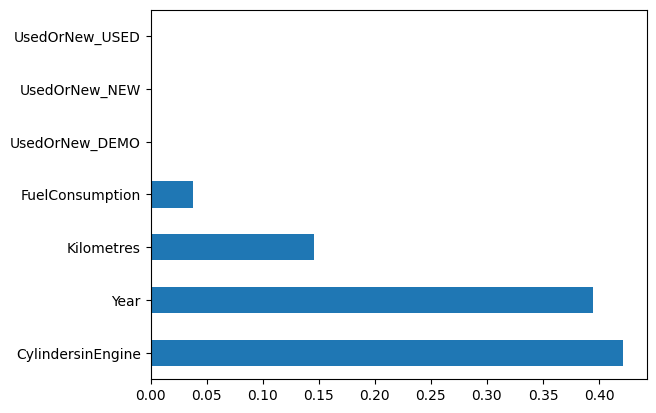

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

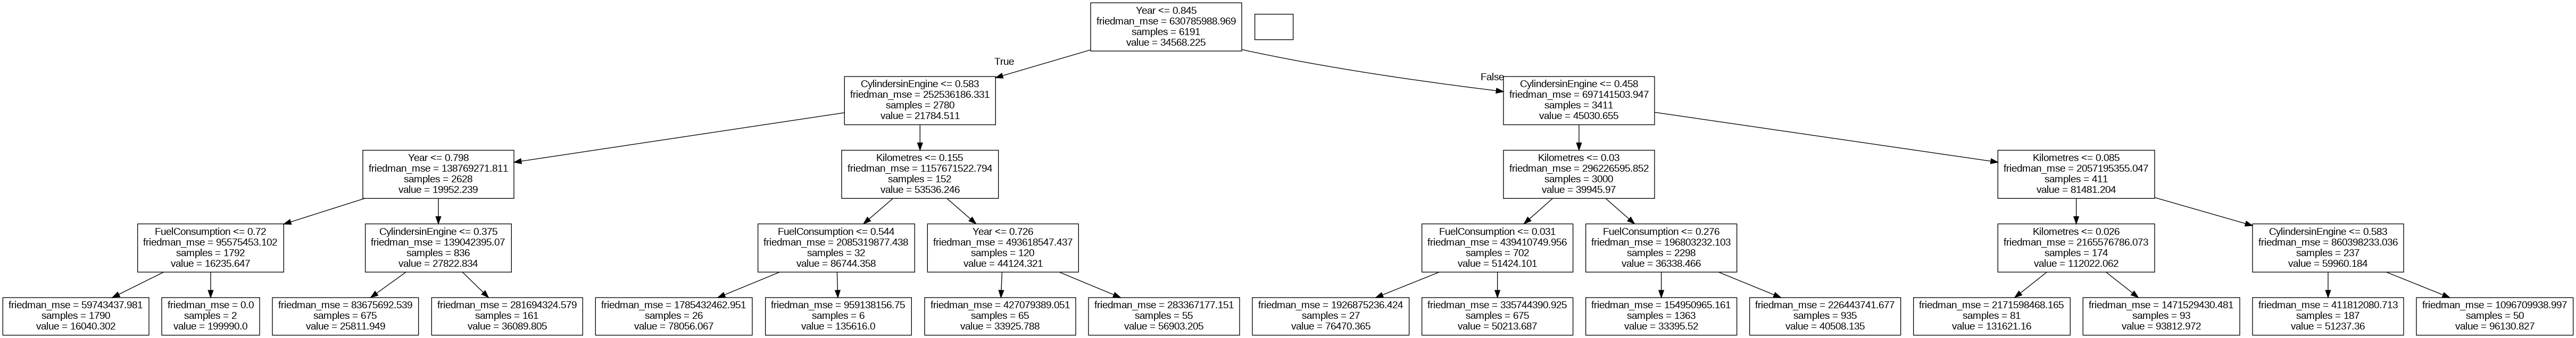

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=5000,height=2000)
# Double click on the graph to zoom in

# Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.5705428805942538

##### Model Validation and Accuracy Calculations ##########
    Year  Kilometres  FuelConsumption  CylindersinEngine  UsedOrNew_DEMO  \
0 0.6905      0.4181           0.3000             0.3333          0.0000   
1 0.8810      0.1445           0.4296             0.5000          0.0000   
2 0.8095      0.0751           0.2370             0.3333          0.0000   
3 0.8571      0.2965           0.2481             0.3333          0.0000   
4 0.9762      0.0046           0.0000             0.0000          1.0000   

   UsedOrNew_NEW  UsedOrNew_USED      Price  PredictedPrice  
0         0.0000          1.0000  8999.0000      19006.0000  
1         0.0000          1.0000 41999.0000      35164.0000  
2         0.0000          1.0000 20990.0000      42466.0000  
3         0.0000          1.0000 20990.0000      32931.0000  
4         0.0000  

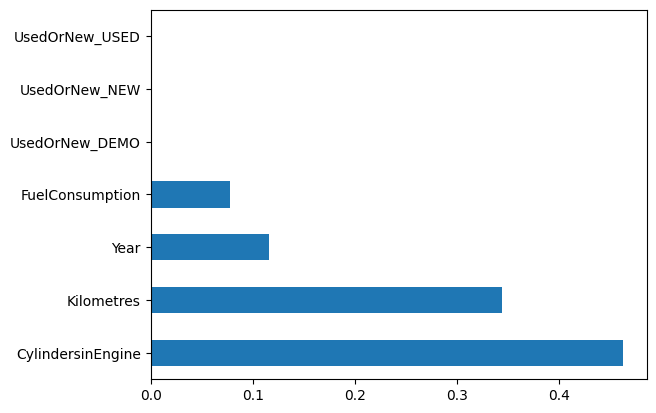

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.7586759960824954

##### Model Validation and Accuracy Calculations ##########
    Year  Kilometres  FuelConsumption  CylindersinEngine  UsedOrNew_DEMO  \
0 0.6905      0.4181           0.3000             0.3333          0.0000   
1 0.88

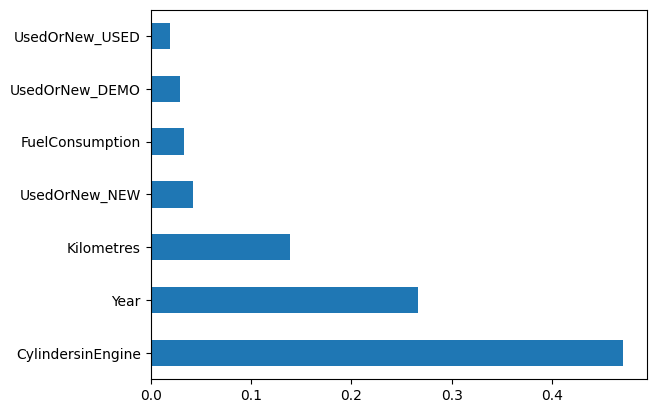

In [ ]:
##XGBoost
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

<Axes: >

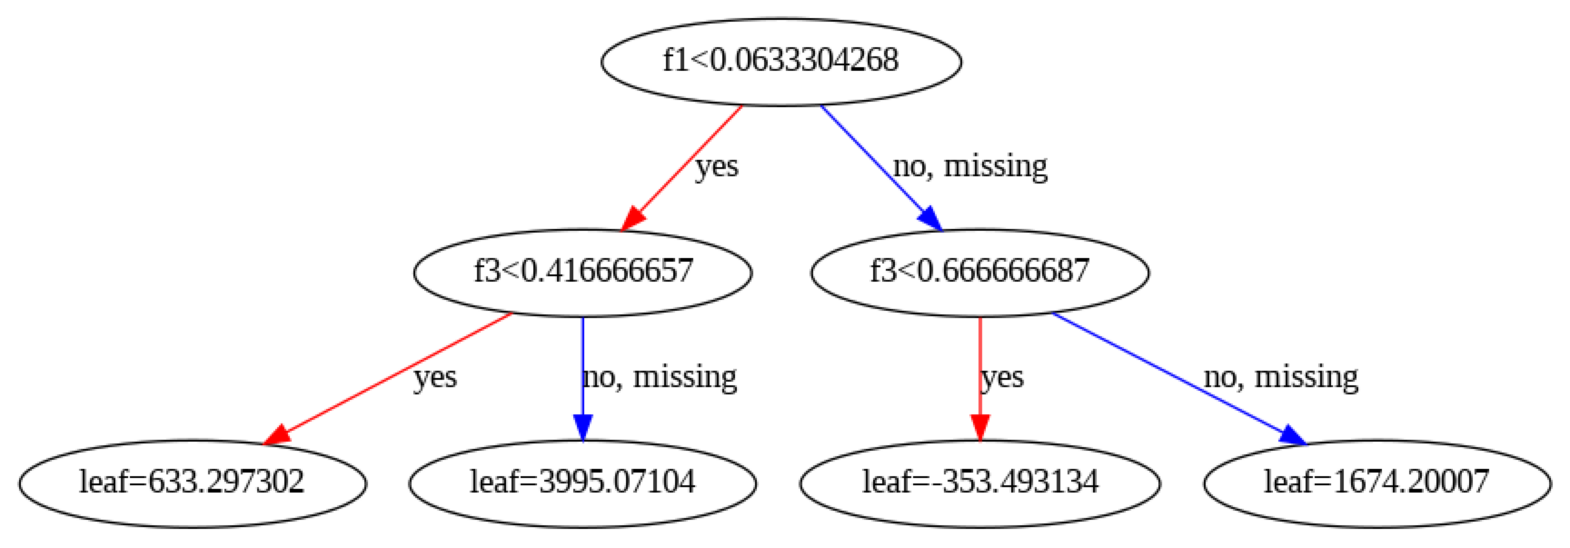

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.8305169911317205

##### Model Validation and Accuracy Calculations ##########
    Year  Kilometres  FuelConsumption  CylindersinEngine  UsedOrNew_DEMO  \
0 0.6905      0.4181           0.3000             0.3333          0.0000   
1 0.8810      0.1445           0.4296             0.5000          0.0000   
2 0.8095      0.0751           0.2370             0.3333          0.0000   
3 0.8571      0.2965           0.2481             0.3333          0.0000   
4 0.9762      0.0046           0.0000             0.0000          1.0000   

   UsedOrNew_NEW  UsedOrNew_USED      Price  PredictedPrice  
0         0.0000          1.0000  8999.0000      12643.0000  
1         0.0000          1.0000 41999.0000      45993.0000  
2         0.0000          1.0000 20990.0000      19807.0000  
3         0.0000          1.0000 20990.0000      18561.0000  
4         0.0000          0.0000 61940.0000      60326.0000  
Mean Accuracy on test data: 69.37129961341381


# Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: -0.03845979929985566

##### Model Validation and Accuracy Calculations ##########
    Year  Kilometres  FuelConsumption  CylindersinEngine  UsedOrNew_DEMO  \
0 0.6905      0.4181           0.3000             0.3333          0.0000   
1 0.8810      0.1445           0.4296             0.5000          0.0000   
2 0.8095      0.0751           0.2370             0.3333          0.0000   
3 0.8571      0.2965           0.2481             0.3333          0.0000   
4 0.9762      0.0046           0.0000             0.0000          1.0000   

   UsedOrNew_NEW  UsedOrNew_USED      Price  PredictedPrice  
0         0.0000          1.0000  8999.0000      28602.0000  
1         0.0000          1.0000 41999.0000      28922.0000  
2         0.0000          1.0000 20990.0000      28917.0000  
3         0.0000          1.0000 20990.0000      28790.0000  
4         0.0000          0.0000 61940.0000      29759.0000  
Mean Accuracy on test data: 40.85614708153934
Median Accu

Using the XGBoost ML Algorithm is the most accurate prediction model

# Step 21 Model Deployment

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Year', 'Kilometres', 'FuelConsumption', 'CylindersinEngine',
       'UsedOrNew_DEMO', 'UsedOrNew_NEW', 'UsedOrNew_USED']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(13964, 7)
(13964,)


# Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [68.92395957 68.99042086 71.31169985 70.58936955 73.4136147  71.45354923
 70.97392469 69.65062604 69.98129079 58.93591745]

Final Average Accuracy of the model: 69.42


# Step 22: Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


# Step 24: Create a python function

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Year', 'Kilometres', 'FuelConsumption', 'CylindersinEngine',
       'UsedOrNew_DEMO', 'UsedOrNew_NEW', 'UsedOrNew_USED']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [ ]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[2020,120000,5.8,6,False,False,True],[1997,340600,8.4,8,False,False,True]],columns=['Year', 'Kilometres', 'FuelConsumption', 'CylindersinEngine',
       'UsedOrNew_DEMO', 'UsedOrNew_NEW', 'UsedOrNew_USED'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Year  Kilometres  FuelConsumption  CylindersinEngine  UsedOrNew_DEMO  \
0  2020      120000           5.8000                  6           False   
1  1997      340600           8.4000                  8           False   

   UsedOrNew_NEW  UsedOrNew_USED  
0          False            True  
1          False            True  
VALUES IN X[[2020.0 120000.0 5.8 6.0 False False False]
 [1997.0 340600.0 8.4 8.0 False False False]]


,Prediction
0,61108.1133
1,38155.9062


# Deploying a predictive model as an API
Django and flask are two popular ways to deploy predictive models as a web service
You can call your predictive models using a URL from any front end like tableau, java or angular js

# Deploying the model with few parameters
# Function for predictions API

In [ ]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_Year,inp_Km,inp_FC,inp_CylInEngine,inp_UORN_D,inp_UORN_N,inp_UORN_U):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Year,inp_Km,inp_FC,inp_CylInEngine,inp_UORN_D,inp_UORN_N,inp_UORN_U]],
     columns=['Year', 'Kilometres', 'FuelConsumption', 'CylindersinEngine',
       'UsedOrNew_DEMO', 'UsedOrNew_NEW', 'UsedOrNew_USED'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(inp_Year = 2020,
                           inp_Km = 120000,
                           inp_FC = 5,
                           inp_CylInEngine = 6,
                           inp_UORN_D = False,
                           inp_UORN_N = False,
                           inp_UORN_U = True
                          )

VALUES IN X[[2020.0 120000.0 5.0 6.0 False False False]]


'{"Prediction":{"0":61724.34375}}'

# Web Deployment using Flask Library/Package
# Installing the flask library required to create the API

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [ ]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Year_value = float(request.args.get('Year'))
        Kilometres_value=float(request.args.get('Kilometres'))
        CylInEngine_value=float(request.args.get('CylInEngine'))
        FuelConsumption_value=float(request.args.get('FuelConsumption'))
        UORN_D_value=bool(request.args.get('UORN_D'))
        UORN_N_value=bool(request.args.get('UORN_N'))
        UORN_U_value=bool(request.args.get('UORN_U'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_Year=Year_value,
                                                       inp_Km=Kilometres_value,
                                                       inp_FC=FuelConsumption_value,
                                                       inp_CylInEngine=CylInEngine_value,
                                                       inp_UORN_D=UORN_D_value,
                                                       inp_UORN_N=UORN_N_value,
                                                       inp_UORN_U=UORN_U_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
'''
Sample URL to call the API
Copy and paste below URL in the web browser
http://127.0.0.1:9000/prediction_api?Year=4.9&RM=6.5&PTRATIO=15.3
'''